100%|██████████| 9912422/9912422 [00:02<00:00, 4721618.50it/s]


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 263726.03it/s]


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 2439806.08it/s]


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 8927145.63it/s]


Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw

initial accuracy: 0.0958
epoch 0 accuracy: 0.9547
epoch 1 accuracy: 0.9566


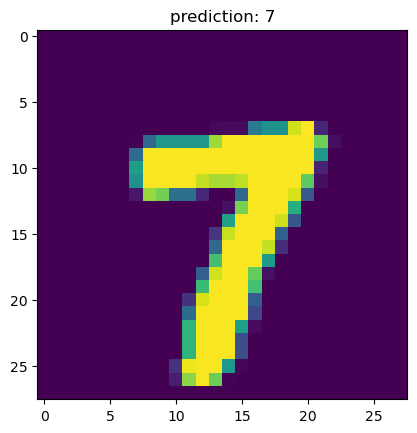

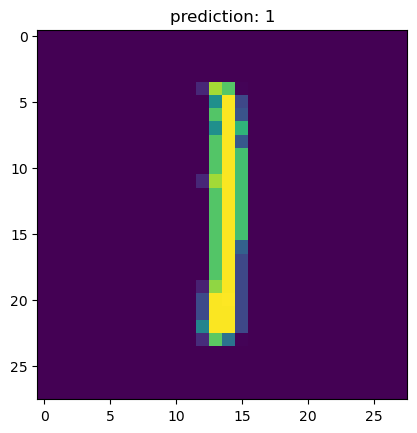

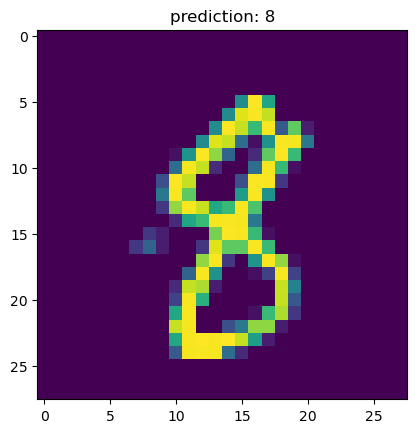

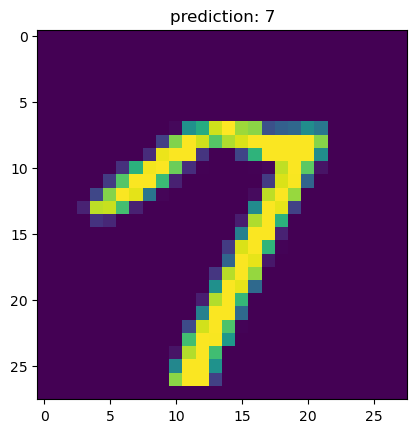

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt


class Net(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(28*28, 64)
        self.fc2 = torch.nn.Linear(64, 64)
        self.fc3 = torch.nn.Linear(64, 64)
        self.fc4 = torch.nn.Linear(64, 10)
    
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        x = torch.nn.functional.log_softmax(self.fc4(x), dim=1)
        return x


def get_data_loader(is_train):
    to_tensor = transforms.Compose([transforms.ToTensor()])
    data_set = MNIST("", is_train, transform=to_tensor, download=True)
    return DataLoader(data_set, batch_size=15, shuffle=True)


def evaluate(test_data, net):
    n_correct = 0
    n_total = 0
    with torch.no_grad():
        for (x, y) in test_data:
            outputs = net.forward(x.view(-1, 28*28))
            for i, output in enumerate(outputs):
                if torch.argmax(output) == y[i]:
                    n_correct += 1
                n_total += 1
    return n_correct / n_total


def main():

    train_data = get_data_loader(is_train=True)
    test_data = get_data_loader(is_train=False)
    net = Net()
    
    print("initial accuracy:", evaluate(test_data, net))
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    for epoch in range(2):
        for (x, y) in train_data:
            net.zero_grad()
            output = net.forward(x.view(-1, 28*28))
            loss = torch.nn.functional.nll_loss(output, y)
            loss.backward()
            optimizer.step()
        print("epoch", epoch, "accuracy:", evaluate(test_data, net))

    for (n, (x, _)) in enumerate(test_data):
        if n > 3:
            break
        predict = torch.argmax(net.forward(x[0].view(-1, 28*28)))
        plt.figure(n)
        plt.imshow(x[0].view(28, 28))
        plt.title("prediction: " + str(int(predict)))
    plt.show()


if __name__ == "__main__":
    main()
